# Ayush Yadav (MDS202315)
# Siddesh Maheshwari (MDS202347)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Updated_Clusters(arr):
        """
        Input: 
            An array of lengths of total documents and the label indicating which cluster they belong to.

        Output:
            We will provide a dictionary of centroids where the keys represent the centroid numbers 
            and the values are lists of documents that belong to each cluster.

        """
        grouped_indices = {}
        for idx, val in np.ndenumerate(arr):
            if val not in grouped_indices:
                grouped_indices[val] = [idx[0]+1]
            else:
                grouped_indices[val].append(idx[0]+1)
        return grouped_indices
    
def New_cluster(my_list,Current_document):
    """
    Input: 
        We are given a list containing all the document numbers that belong to the centroid,
        along with the corresponding dictionary super set.

    Output:
        We will create a centroid of the words with the highest count.
        We will take the top words that are in the top (average length of the documents in the cluster).

    """

    from collections import Counter
    counter = Counter()
    total = 0
    our_list = []
    for i in my_list:
        our_list += [Current_document[i]]

    for d in our_list:
        counter.update(d.keys())
        total += len(d.keys())

    most_common_keys = [key for key, count in counter.items()]
    sorted_keys = sorted(most_common_keys, key=lambda x: counter[x], reverse=True)
    top_keys = sorted_keys[:int(total/len(our_list))+1]
    result_dict = {key: True for key in top_keys}
    return result_dict


def Distacnce(Centers,i,j,Current_document):
    """
    Input: 
        Takes 2 indices, one from the center and another from the super set of documents.

        Output:
        Returns their Jaccard Distance. 
    """

    union_sum = len(Centers[i].keys()|Current_document[j].keys())
    intersection_sum = len(Centers[i].keys()&Current_document[j].keys())
    return 1- (intersection_sum/union_sum)

def Distacnce_for_plus_plus_(Current_document,next_center,last_centers):
    """
    For the initial centroid allocation for K-means++ implementation,
    we will find the next centroid which is at least 0.8 distance away from all others.
    """

    for last_center in last_centers:
        if Distacnce(Current_document,next_center,last_center,Current_document)<.8:
            return False
    return True 

def Inertia(Centers,Center_Distances,Current_document):
    """
    Given all the clusters and documents, we will return the sum of their Jaccard distances as the inertia.
    """

    inertia = 0
    for i in range(1,len(Center_Distances)):
        inertia += Distacnce(Centers,int(Center_Distances[i]),i,Current_document)
    return inertia

def Cluster_distacnce(D,i,j,Current_document):
    """
    To make our computation free from rounding errors, we will use the intersection
    and union sums of document words, making comparisons easier.
    """

    union_sum = len(D[i].keys()|Current_document[j].keys())
    intersection_sum = len(D[i].keys()&Current_document[j].keys())
    return [intersection_sum,union_sum]

def find_mini_Distacnce_cluster(Centers,k,j,Current_document):
    """
    After building centroids, we will again decide which cluster a document 'i' belongs to and return that cluster ID.
    """

    mini_list_1 = Cluster_distacnce(Centers,1,j,Current_document)
    clt = 1
    for i in range(1,k):
        mini_list_2  = Cluster_distacnce(Centers,i+1,j,Current_document)
        if mini_list_2[0]*mini_list_1[1]>mini_list_2[1]*mini_list_1[0]:
            mini_list_1=mini_list_2
            clt= i+1
    return clt

def KMeans(k=5,total_document=[],Current_document={}):
    """
    Input:
        k = An integer specifying the number of desired centroids.
        total_document = A list containing information about the number of documents and words.
        Current_document = A dictionary containing all documents along with their words.

    Output:
        Optimal_Cluster = The clusters that are optimal for this setting of k.
        Minimum_inertia = The inertia of this whole setting.

    """
    Centers = {}
    last_center = 1 #np.random.randint(1,total_document[0]+1)
    next_center = 2  # For k means we choose all randomly
    last_centers = [1]
    Centers[1] = Current_document[last_center]
    for i in range(1,k):
        while Distacnce_for_plus_plus_(Current_document,next_center,last_centers) !=True :
            next_center+=1
        # print(next_center)
        last_centers+= [next_center]
        Centers[i+1] = Current_document[next_center]
        next_center = 1+next_center
    Inter = []
    Center_Distances = np.full((total_document[0]+1),dtype="float",fill_value=None)
    for j in range(1,total_document[0]+1):
            Center_Distances[j] = find_mini_Distacnce_cluster(Centers,k,j,Current_document)
    Minimum_inertia = float('inf')

    for intater in range(50):
        Updated_Clusters_dictionary = Updated_Clusters(Center_Distances[1:])
        for i in range(k):
            Centers[i+1] = New_cluster(Updated_Clusters_dictionary[i+1],Current_document)
        for j in range(1,total_document[0]+1):
            Center_Distances[j] = find_mini_Distacnce_cluster(Centers,k,j,Current_document)
        current_cluster = Inertia(Centers,Center_Distances,Current_document)
        if current_cluster < Minimum_inertia:
            Minimum_inertia = current_cluster
            Optimal_Cluster = Updated_Clusters_dictionary
        Inter.append(current_cluster)
    return Optimal_Cluster,Minimum_inertia

enron
k:=  1
k:=  2
k:=  3
k:=  4
k:=  5
k:=  6
k:=  7
k:=  8
k:=  9
k:=  10
k:=  11
k:=  12
k:=  13
k:=  14
k:=  15
k:=  16
k:=  17
k:=  18
k:=  19
k:=  20
k:=  21
k:=  22
k:=  23
k:=  24
k:=  25


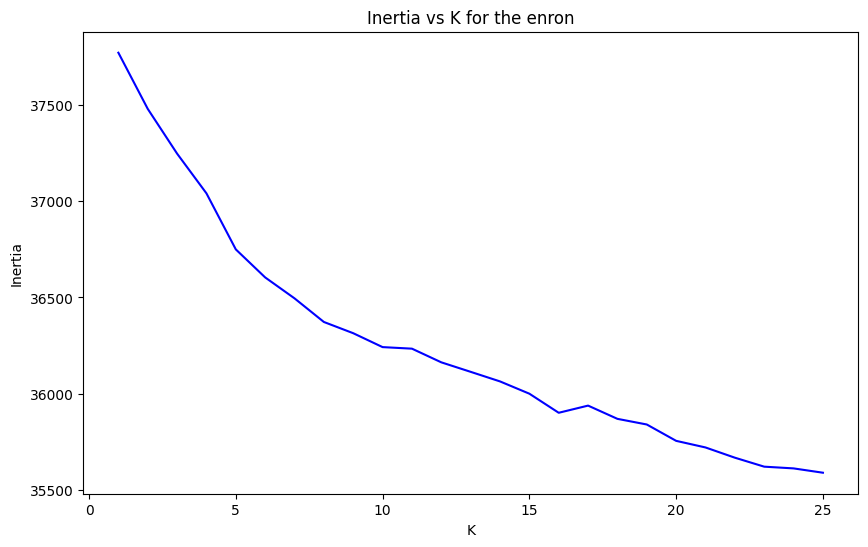

kos
k:=  1
k:=  2
k:=  3
k:=  4
k:=  5
k:=  6
k:=  7
k:=  8
k:=  9
k:=  10
k:=  11
k:=  12
k:=  13
k:=  14
k:=  15
k:=  16
k:=  17
k:=  18
k:=  19
k:=  20
k:=  21
k:=  22
k:=  23
k:=  24
k:=  25


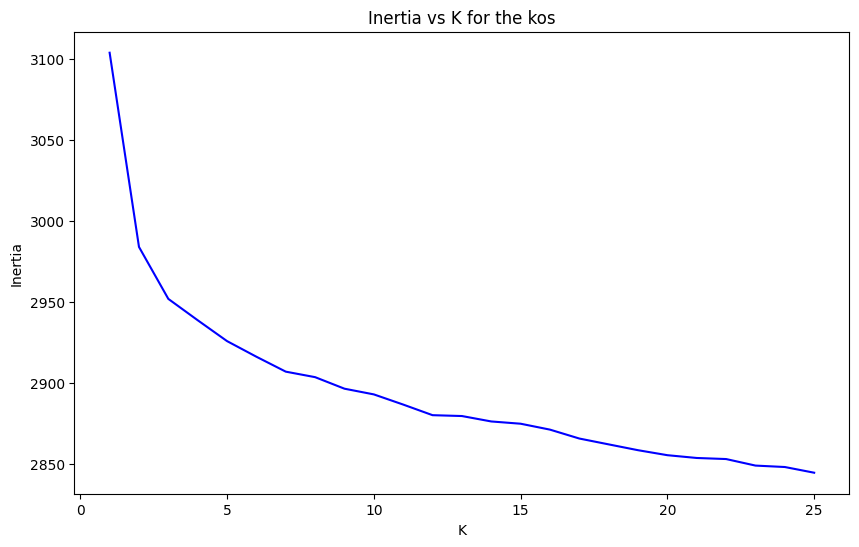

nips
k:=  1
k:=  2
k:=  3
k:=  4
k:=  5
k:=  6
k:=  7
k:=  8
k:=  9
k:=  10
k:=  11
k:=  12
k:=  13
k:=  14
k:=  15
k:=  16
k:=  17
k:=  18
k:=  19
k:=  20
k:=  21
k:=  22
k:=  23
k:=  24
k:=  25


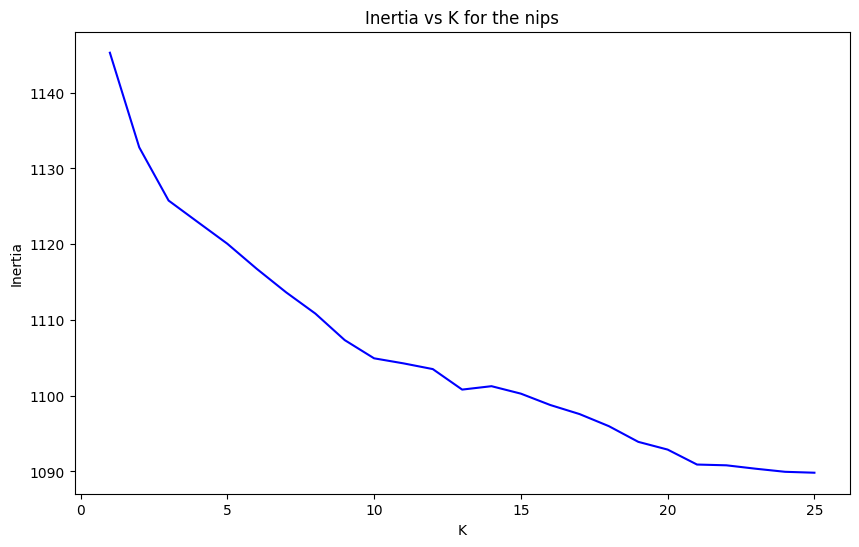

In [3]:
for item in ['enron',"kos","nips"] :
    print(item)

    # Reading the file Into Dictionary Format
    with open(f"docword.{item}.txt","r") as f1:
        content = f1.readlines()
    vars()[f'{item}_details'] = [int(content[i]) for i in range(3)]
    vars()[f'{item}'] = {}
    for i in range(3,len(content)):
        Spilit = list(map(int,content[i].split(" ")))
        if Spilit[0] in vars()[f'{item}'].keys():
            vars()[f'{item}'][Spilit[0]][Spilit[1]] = True
        else:
            vars()[f'{item}'][Spilit[0]] = {}
            vars()[f'{item}'][Spilit[0]][Spilit[1]] = True
    K_inertias = [ ]
    for _ in range(25):
        print("k:= ",end=" ")
        print(_+1)
        inertia_values  = KMeans(_+1,total_document=vars()[f'{item}_details'],Current_document=vars()[f'{item}'])
        K_inertias.append(inertia_values)
    inertia_k =[]
    for i in K_inertias:
        inertia_k.append(i[1])
    index_values = np.arange(1, len(inertia_k) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(index_values, inertia_k, linestyle='-', color='b')  # Continuous line without markers
    plt.title('Inertia vs K for the '+ item)
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()
    # If you want clusters also those are in K_inertias